In [53]:
import pandas as pd

weather_record = pd.read_csv('../../Data/weather/weather_record.csv')
electricity_record = pd.read_csv('../../Data/electricity/electricity_record.csv')

In [54]:
date = ''
day = 0
days = []
hours = []
times = []

for index, row in electricity_record.iterrows():
    if date != row['DateTime'].split(' ')[0]:
        date, _ = row['DateTime'].split(' ')
        day += 1
        day %= 7
    
    hour, time = row['DateTime'].split(' ')[1].split(':')
    days.append(day)
    hours.append(int(hour))
    times.append(int(time))
electricity_record['day'] = days
electricity_record['hour'] = hours
electricity_record['time'] = times
days = hours = times = None

electricity_record['demand'] = electricity_record[['grid', 'solar']].apply(lambda x: sum(x), axis=1)
electricity_record['demand+1'] = electricity_record['demand'].shift(-1)
electricity_record = electricity_record.drop(['DateTime', 'grid', 'solar'], axis=1)
electricity_record

,day,hour,time,demand,demand+1
0,1,0,0,1.260,1.169
1,1,0,15,1.169,1.046
2,1,0,30,1.046,0.955
3,1,0,45,0.955,1.102
4,1,1,0,1.102,1.182
5,1,1,15,1.182,1.595
6,1,1,30,1.595,1.249
7,1,1,45,1.249,0.722
8,1,2,0,0.722,0.978
9,1,2,15,0.978,1.420


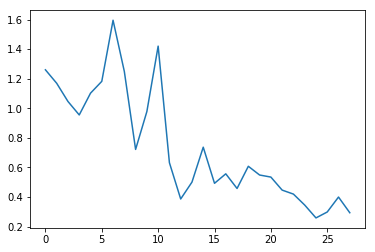

In [109]:
plt.plot(electricity_record['demand'][:28])

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Means:  ['115.43', '111.93', '113.07', '112.03', '120.31', '124.29', '131.57']
Median:  ['99.88', '89.27', '96.62', '88.77', '88.23', '128.33', '124.67']
Max:  ['244.04', '219.68', '258.55', '227.72', '284.17', '233.86', '269.13']
Min:  ['40.43', '37.92', '40.71', '34.65', '39.57', '48.17', '46.05']


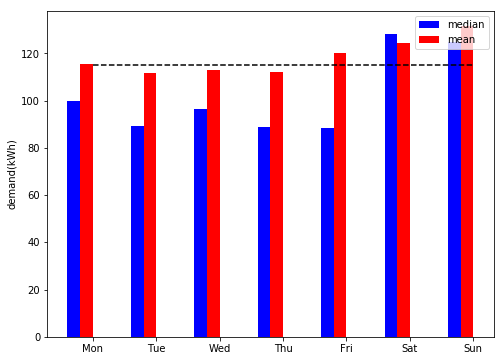

In [106]:
import matplotlib.pyplot as plt

collection = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}

day_wise_record = []
day = 1
total = 0
for idx, row in electricity_record.iterrows():
    if day != row['day']:
        collection[day].append(total)
        total = 0
        day = row['day']
    total += row['demand']
collection[day].append(total)  


#for idx, row in electricity_record.iterrows():
#    collection[row['day']].append(row['demand'])
        
plt.figure(figsize=(8, 6))
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
y_pos = np.arange(len(days))
medians = [np.median(collection[x]) for x in range(7)]
means = [np.mean(collection[x]) for x in range(7)]
maxs = [np.max(collection[x]) for x in range(7)]
mins = [np.min(collection[x]) for x in range(7)]

print([x for x in days])
print('Means: ', ['{:.2f}'.format(x) for x in means])
print('Median: ', ['{:.2f}'.format(x) for x in medians])
print('Max: ', ['{:.2f}'.format(x) for x in maxs])
print('Min: ', ['{:.2f}'.format(x) for x in mins])

x_pos = np.arange(7)

plt.bar(x_pos-0.3, medians, color='b', width=0.2, label='median')
plt.bar(x_pos-0.1, means, color='r', width=0.2, label='mean')
#plt.bar(x_pos+0.1, maxs, color='y', width=0.2, label='max')
#plt.bar(x_pos+0.3, mins, color='g', width=0.2, label='min')
plt.plot([0., 6.], [115, 115], "k--")
plt.legend(loc='upper right')
plt.xticks(y_pos, days)
plt.ylabel('demand(kWh)')
plt.title('')
plt.show()


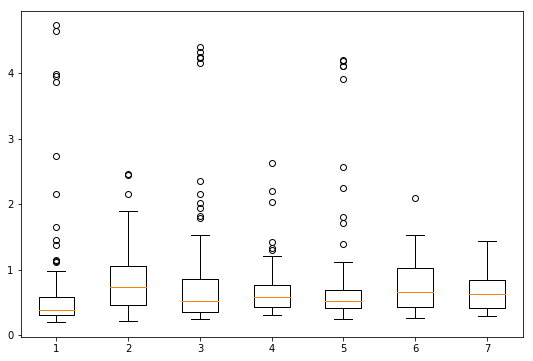

In [81]:
def box_data(data):
    return data

box_collects = [box_data(collection[0][:100]), 
                box_data(collection[1][:100]),
                box_data(collection[2][:100]),
                box_data(collection[3][:100]),
                box_data(collection[4][:100]),
                box_data(collection[5][:100]),
                box_data(collection[6][:100])]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(box_collects)


In [40]:
'''
weather_record = weather_record[['Date', 'AvgTemperature', 'AvgDew', 'AvgHumidity', 'AvgWindspeed', 'Precipitation']]
electricity_record['temp'] = ''
electricity_record['dew'] = ''
electricity_record['humidity'] = ''
electricity_record['windspeed'] = ''
electricity_record['precipication'] = ''

for i, _ in electricity_record.iterrows():
    index = i // 96
    electricity_record.at[i, 'temp'] = weather_record.at[index, 'AvgTemperature']
    electricity_record.at[i, 'dew'] = weather_record.at[index, 'AvgDew']
    electricity_record.at[i, 'humidity'] = weather_record.at[index, 'AvgHumidity']
    electricity_record.at[i, 'windspeed'] = weather_record.at[index, 'AvgWindspeed']
    electricity_record.at[i, 'precipication'] = weather_record.at[index, 'Precipitation']
    
electricity_record['solar'] = electricity_record['solar'].shift(-1)
electricity_record
'''

,grid,solar,day,hour,time,temp,dew,humidity,windspeed,precipication
0,1.255,0.004,1,0,0,41.5,36.8,83.5,11.2,0
1,1.163,0.004,1,0,15,41.5,36.8,83.5,11.2,0
2,1.041,0.000,1,0,30,41.5,36.8,83.5,11.2,0
3,0.951,0.000,1,0,45,41.5,36.8,83.5,11.2,0
4,1.098,0.001,1,1,0,41.5,36.8,83.5,11.2,0
5,1.182,0.000,1,1,15,41.5,36.8,83.5,11.2,0
6,1.595,0.006,1,1,30,41.5,36.8,83.5,11.2,0
7,1.248,0.011,1,1,45,41.5,36.8,83.5,11.2,0
8,0.722,0.004,1,2,0,41.5,36.8,83.5,11.2,0
9,0.972,0.002,1,2,15,41.5,36.8,83.5,11.2,0


In [38]:
def train_test_split(X, y, rate=0.8):
    leng = len(data)
    X_train, X_test = X[:int(leng*rate)], X[int(leng*rate):]
    y_train, y_test = y[:int(leng*rate)], y[int(leng*rate):]
    
    return X_train, X_test, y_train, y_test

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def normalization(train):
    train_norm = train.apply(lambda x: (x - np.mean(x))/(np.max(x)-np.min(x)))
    return train_norm

electricity_record = normalization(electricity_record)
electricity_record.head(5)

,grid,solar,day,hour,time,temp,dew,humidity,windspeed,precipication
0,0.064433,-0.182914,-0.331666,-0.500051,-0.500000,-0.543796,-0.376962,0.256758,0.169541,-0.022363
1,0.057384,-0.182689,-0.331666,-0.500051,-0.166667,-0.543796,-0.376962,0.256758,0.169541,-0.022363
2,0.048037,-0.182914,-0.331666,-0.500051,0.166667,-0.543796,-0.376962,0.256758,0.169541,-0.022363
3,0.041142,-0.183139,-0.331666,-0.500051,0.500000,-0.543796,-0.376962,0.256758,0.169541,-0.022363
4,0.052404,-0.183139,-0.331666,-0.456572,-0.500000,-0.543796,-0.376962,0.256758,0.169541,-0.022363


In [28]:
class demand_model:
    
    def __init__(self):
        self.model = Sequential()
        self.model.add(LSTM(256, input_shape=(15, 128), return_sequences=True))
        self.model.add(LSTM(256, return_sequences=True))
        self.model.add(TimeDistributed(Dense(1)))
        self.model.add(Flatten())
        self.model.add(Dense(5, activation='linear'))
        self.model.add(Dense(1))
        self.model.compile(loss='mean_absolute_error',
                           optimizer='adam',
                           matrics=['mean_absolute_error'])
        self.model.summary()

In [29]:
model = demand_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 15, 256)           394240    
_________________________________________________________________
lstm_4 (LSTM)                (None, 15, 256)           525312    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 15, 1)             257       
_________________________________________________________________
flatten_2 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 919,895
Trainable params: 919,895
Non-trainable params: 0
_________________________________________________________________


In [36]:
electricity_record[:10]

,grid,solar,day,hour,time,temp,dew,humidity,windspeed,precipication
0,1.255,0.005,1,0,0,41.5,36.8,83.5,11.2,0
1,1.163,0.004,1,0,15,41.5,36.8,83.5,11.2,0
2,1.041,0.004,1,0,30,41.5,36.8,83.5,11.2,0
3,0.951,0.000,1,0,45,41.5,36.8,83.5,11.2,0
4,1.098,0.000,1,1,0,41.5,36.8,83.5,11.2,0
5,1.182,0.001,1,1,15,41.5,36.8,83.5,11.2,0
6,1.595,0.000,1,1,30,41.5,36.8,83.5,11.2,0
7,1.248,0.006,1,1,45,41.5,36.8,83.5,11.2,0
8,0.722,0.011,1,2,0,41.5,36.8,83.5,11.2,0
9,0.972,0.004,1,2,15,41.5,36.8,83.5,11.2,0
